/var/folders/r6/s10ql4nx4dz67qrky4s76c900000gn/T/ipykernel_31815/2176286764.py:105: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/27 (0%)]	Loss: 1.095585
Train Epoch: 2 [0/27 (0%)]	Loss: 1.099783
Train Epoch: 3 [0/27 (0%)]	Loss: 1.096941
Train Epoch: 4 [0/27 (0%)]	Loss: 1.095795
Train Epoch: 5 [0/27 (0%)]	Loss: 1.087925
Train Epoch: 6 [0/27 (0%)]	Loss: 1.097082
Train Epoch: 7 [0/27 (0%)]	Loss: 1.095916
Train Epoch: 8 [0/27 (0%)]	Loss: 1.090130
Train Epoch: 9 [0/27 (0%)]	Loss: 1.082627
Train Epoch: 10 [0/27 (0%)]	Loss: 1.106732
Train Epoch: 11 [0/27 (0%)]	Loss: 1.093196
Train Epoch: 12 [0/27 (0%)]	Loss: 1.101219
Train Epoch: 13 [0/27 (0%)]	Loss: 1.095951
Train Epoch: 14 [0/27 (0%)]	Loss: 1.088220
Train Epoch: 15 [0/27 (0%)]	Loss: 1.085181
Train Epoch: 16 [0/27 (0%)]	Loss: 1.087833
Train Epoch: 17 [0/27 (0%)]	Loss: 1.080308
Train Epoch: 18 [0/27 (0%)]	Loss: 1.088686
Train Epoch: 19 [0/27 (0%)]	Loss: 1.087075
Train Epoch: 20 [0/27 (0%)]	Loss: 1.087278
Train Epoch: 21 [0/27 (0%)]	Loss: 1.092984
Train Epoch: 22 [0/27 (0%)]	Loss: 1.091952
Train Epoch: 23 [0/27 (0%)]	Loss: 1.072301
Train Epoch: 24 [0/2

100%|██████████| 6/6 [00:00<00:00, 23.66it/s]


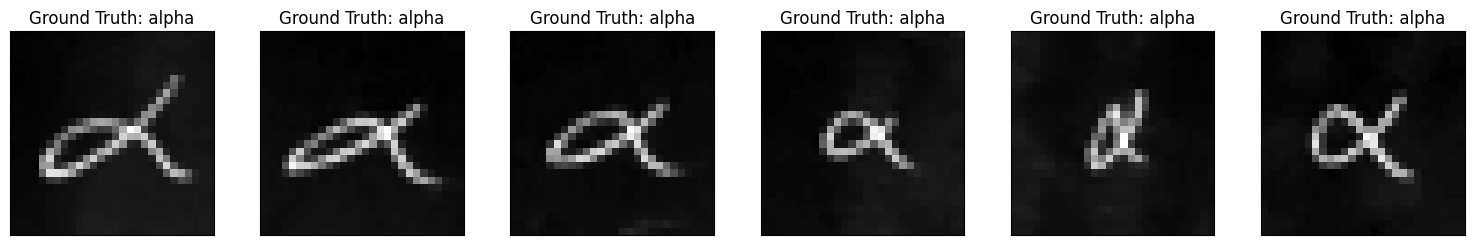


Test set: Avg. loss: 1.1003, Accuracy: 7/15 (47%)

Train Epoch: 1 [0/27 (0%)]	Loss: 1.065634

Test set: Avg. loss: 1.1005, Accuracy: 7/15 (47%)

Train Epoch: 2 [0/27 (0%)]	Loss: 1.067525

Test set: Avg. loss: 1.1005, Accuracy: 7/15 (47%)

Train Epoch: 3 [0/27 (0%)]	Loss: 1.063237

Test set: Avg. loss: 1.1006, Accuracy: 6/15 (40%)

Train Epoch: 4 [0/27 (0%)]	Loss: 1.071842

Test set: Avg. loss: 1.1009, Accuracy: 6/15 (40%)

Train Epoch: 5 [0/27 (0%)]	Loss: 1.078807

Test set: Avg. loss: 1.1009, Accuracy: 6/15 (40%)

Train Epoch: 6 [0/27 (0%)]	Loss: 1.068536

Test set: Avg. loss: 1.1009, Accuracy: 7/15 (47%)

Train Epoch: 7 [0/27 (0%)]	Loss: 1.073388

Test set: Avg. loss: 1.1010, Accuracy: 7/15 (47%)

Train Epoch: 8 [0/27 (0%)]	Loss: 1.054709

Test set: Avg. loss: 1.1013, Accuracy: 7/15 (47%)

Train Epoch: 9 [0/27 (0%)]	Loss: 1.068574

Test set: Avg. loss: 1.1014, Accuracy: 7/15 (47%)

Train Epoch: 10 [0/27 (0%)]	Loss: 1.051842

Test set: Avg. loss: 1.1014, Accuracy: 7/15 (47%)

Train E

In [113]:
#  Created by SHIRISH KISHORE KUMAR & SOORYA
#  Created on 04/10/2023
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
import tqdm
import matplotlib.pyplot as plt

#Define the hyperparameters
n_epochs = 45
batch_size_test = 10
batch_size_train = 128
learning_rate = 0.01
momentum = 0.5
log_interval = 10

#Loading the greek dataset
trainset_data_folder = "/Users/shirish/Downloads/greek_train"
testset_data_folder = "/Users/shirish/Downloads/Greek2"
#Creating a transform to normalize the data
greek_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.Lambda(lambda x: torchvision.transforms.functional.invert(x)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
#Download and load the training data
greek_trainset = torchvision.datasets.ImageFolder(trainset_data_folder, transform=greek_transform)
greek_testset = torchvision.datasets.ImageFolder(testset_data_folder, transform=greek_transform)
#Creating a DataLoader for the training dataset
#Reference:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
train_loader = DataLoader(greek_trainset, batch_size=batch_size_train, shuffle=True)
test_loader = DataLoader(greek_testset, batch_size=batch_size_train, shuffle=True)
#Defining the variables to store the training and test losses
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
#Defining the training function
#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/Users/shirish/trained model/model.pth')
      torch.save(optimizer.state_dict(), '/Users/shirish/trained model/optimizer.pth')
#Defining the test function
#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        #include tqdm for progress bar
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
#Defining the network
#Reference:
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
class GreekNet(nn.Module):
    def __init__(self):
        super(GreekNet, self).__init__()
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 3),
        )
    #Define the forward pass
    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)
#Creating the network object
network = GreekNet()
#Defining the optimizer
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
#Training the network
for epoch in range(1, n_epochs + 1):
    train(epoch)
#saving the model
model_save_path = "/Users/shirish/trained model/model.pth"
torch.save(network.state_dict(), model_save_path)
#Displaying the results
fig = plt.figure(figsize=(15, 15))
for i in tqdm.tqdm(range(6)):
    image, label = greek_trainset[i]
    plt.subplot(5, 6, i+1)
    plt.tight_layout()
    plt.imshow(image.squeeze().numpy(), cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(greek_trainset.classes[label]))
    plt.xticks([])
    plt.yticks([])
plt.show()
#Loading the model
model_load_path = "/Users/shirish/trained model/model.pth"
network.load_state_dict(torch.load(model_load_path))
#Testing the model
test()
# Plot the results
# Test the model after each epoch and store the test losses
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()



/var/folders/r6/s10ql4nx4dz67qrky4s76c900000gn/T/ipykernel_31815/874393790.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Example 1
Outputs: -1.17 -1.03 -1.10
Prediction: beta Correct label: alpha
Example 2
Outputs: -1.23 -0.99 -1.09
Prediction: beta Correct label: alpha
Example 3
Outputs: -1.22 -0.99 -1.10
Prediction: beta Correct label: alpha
Example 4
Outputs: -1.23 -1.00 -1.08
Prediction: beta Correct label: alpha
Example 5
Outputs: -1.02 -1.09 -1.19
Prediction: alpha Correct label: alpha
Example 6
Outputs: -1.15 -1.02 -1.13
Prediction: beta Correct label: alpha
Example 7
Outputs: -1.19 -1.00 -1.12
Prediction: beta Correct label: alpha
Example 8
Outputs: -1.18 -1.03 -1.09
Prediction: beta Correct label: alpha
Example 9
Outputs: -1.18 -1.02 -1.11
Prediction: beta Correct label: alpha
Example 10
Outputs: -1.20 -1.03 -1.08
Prediction: beta Correct label: alpha
Example 11
Outputs: -1.16 -1.02 -1.13
Prediction: beta Correct label: alpha
Example 12
Outputs: -1.20 -1.00 -1.10
Prediction: beta Correct label: alpha
Example 13
Outputs: -1.23 -1.04 -1.04
Prediction: beta Correct label: beta
Example 14
Outputs: -

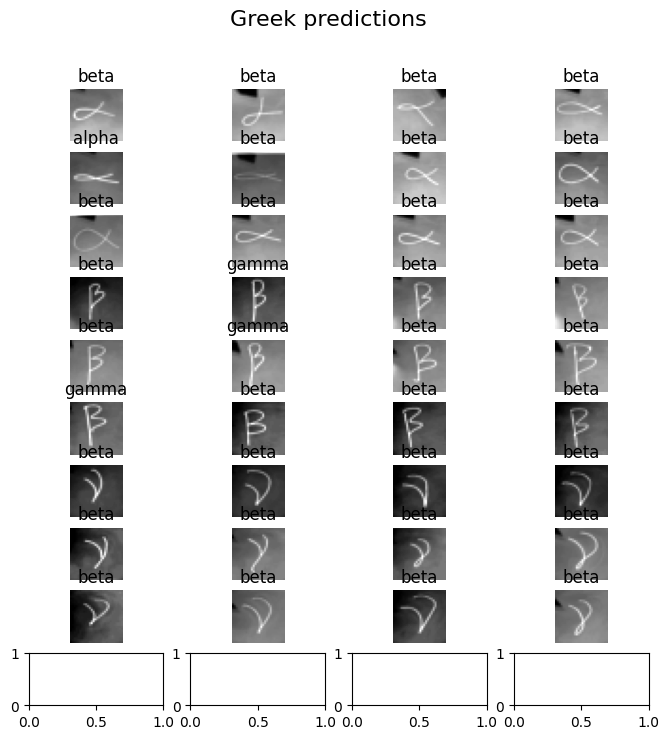

In [114]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image

#Defining the network
#Reference:
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
class GreekNet(nn.Module):
    def __init__(self):
        super(GreekNet, self).__init__()
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 3),
        )
    #Define the forward pass
    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)
#Extracting the data
trainset_data_folder = "/Users/shirish/Downloads/greek_train"
testset_data_folder = "/Users/shirish/Downloads/Greek1"
#Defining the transforms
greek_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.Lambda(lambda x: torchvision.transforms.functional.invert(x)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
#Loading the data
test_set = ImageFolder(testset_data_folder, transform=greek_transform)
#Creating the dataloader
#Reference:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)
#Loading the model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
#Creating the network object
model = GreekNet()
model.load_state_dict(state_dict)
#Testing the model
model.eval()
#Defining the classes
classes = ['alpha', 'beta', 'gamma']
#Plotting the results
fig, axes = plt.subplots(10, 4, figsize=(8, 8))
fig.suptitle('Greek predictions', fontsize=16)
#Testing the model
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        images = images.numpy()
        labels = labels.numpy()
        predicted = predicted.numpy()
        print('Example', i+1)
        print('Outputs:', ' '.join(['%.2f' % output for output in outputs[0].tolist()]))
        print('Prediction:', classes[predicted[0]], 'Correct label:', classes[labels[0]])
        row = i // 4
        col = i % 4
        axes[row, col].imshow(np.squeeze(images[0]), cmap='gray')
        axes[row, col].set_title(classes[predicted[0]])
        axes[row, col].axis('off')

        if i == 40:
            break

plt.show()


In [115]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import cv2

#Defining the network
transform = transforms.Compose([transforms.ToTensor()])
#loading the model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
#Defining the network
#Reference:
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 3),
        )
    #Define the forward pass
    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)
#Defifning the model
model = Net()
model.load_state_dict(state_dict)
#printing the model
print(model)

Net(
  (mnist_net): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout2d(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=320, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=3, bias=True)
  )
)


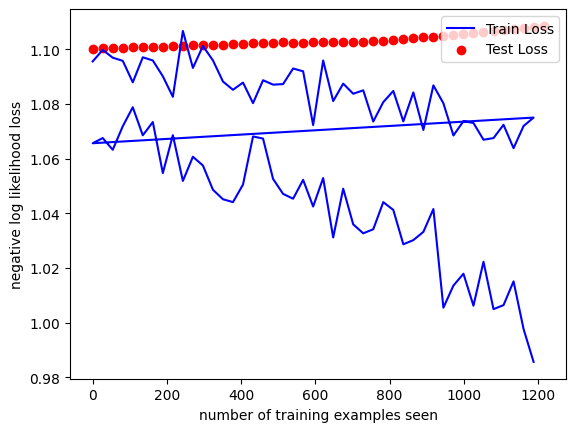

In [116]:
#Printing the train loss and test loss
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()